<a href="https://colab.research.google.com/github/MansourMhz/MansourMhz/blob/main/Copy_of_Untitled18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pwd

'/content'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch

In [4]:
pwd

'/content'

In [6]:
dataset = pd.read_csv('/content/drive/MyDrive/MasterThesis/xauusd.csv')

In [7]:
type(dataset)

pandas.core.frame.DataFrame

In [8]:
dataset.head(5)

,Date,Open,High,Low,Close
0,2016-03-01,1240.49,1248.77,1227.48,1232.66
1,2016-03-02,1231.44,1244.23,1225.02,1239.83
2,2016-03-03,1239.49,1268.55,1237.72,1264.87
3,2016-03-04,1260.20,1279.97,1250.78,1261.55
4,2016-03-07,1264.23,1273.43,1257.12,1267.54


In [9]:
dataset.shape

(1451, 5)

In [10]:
dataset.shape[0]

1451

In [11]:
dataset.shape[1]

5

In [12]:
num_train = int(dataset.shape[0]*0.70)

In [13]:
training_set = dataset.iloc[0:num_train,1].values #open

In [14]:
training_set.shape

(1015,)

In [15]:
testing_set = dataset.iloc[num_train:,1].values

In [16]:
testing_set.shape

(436,)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
type(training_set)

numpy.ndarray

In [19]:
sc = MinMaxScaler(feature_range=(0,1))

In [20]:
training_set_scaled = sc.fit_transform(training_set.reshape(-1,1))

In [21]:
testing_set_scaled = sc.fit_transform(testing_set.reshape(-1,1))

In [22]:
type(training_set_scaled)

numpy.ndarray

In [23]:
timestep = 60
X_train =[]
Y_train =[]

In [24]:
len(training_set)

1015

In [25]:
for i in range(timestep,len(training_set)):
    X_train.append(training_set_scaled[i-timestep:i,0])
    Y_train.append(training_set_scaled[i,0])

In [26]:
type(X_train)

x_train = np.array(X_train)

x_train = np.array(X_train)
y_train = np.array(Y_train)

In [27]:
type(y_train)

y_train.shape

x_train.shape

X_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))

X_train.shape

Y_train = np.reshape(y_train,(y_train.shape[0],1))

Y_train.shape

X_test = []
Y_test =[]

In [28]:
for i in range(timestep,len(testing_set)):
    X_test.append(testing_set_scaled[i-timestep:i,0])
    Y_test.append(testing_set_scaled[i,0])

In [29]:
x_test = np.array(X_test)
y_test = np.array(Y_test)

X_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

Y_test = np.reshape(y_test,(y_test.shape[0],1))

#modeling
X_train
Y_train
#testing
X_test
Y_test

array([[0.36633879],
       [0.3914149 ],
       [0.38999297],
       [0.39830707],
       [0.36098565],
       [0.41684232],
       [0.39159892],
       [0.38361939],
       [0.39198367],
       [0.41583024],
       [0.43910803],
       [0.46548898],
       [0.44263776],
       [0.46500385],
       [0.46836629],
       [0.43390545],
       [0.44457827],
       [0.43644819],
       [0.40618622],
       [0.40708956],
       [0.42007093],
       [0.44924554],
       [0.45339423],
       [0.43470842],
       [0.38890562],
       [0.4137308 ],
       [0.3618388 ],
       [0.38512496],
       [0.41145572],
       [0.45167118],
       [0.43470006],
       [0.44407642],
       [0.43027535],
       [0.43213222],
       [0.43224932],
       [0.42534043],
       [0.47189602],
       [0.47995918],
       [0.50217471],
       [0.49088293],
       [0.49747399],
       [0.51480478],
       [0.51007059],
       [0.5265315 ],
       [0.50448325],
       [0.51552411],
       [0.51610124],
       [0.530

In [30]:
x_train = torch.from_numpy(X_train).type(torch.Tensor)

In [31]:
type(x_train)

y_train = torch.from_numpy(Y_train).type(torch.Tensor)

x_test = torch.from_numpy(X_test).type(torch.Tensor)

y_test = torch.from_numpy(Y_test).type(torch.Tensor)

x_train
y_train
x_test
y_test

tensor([[0.3663],
        [0.3914],
        [0.3900],
        [0.3983],
        [0.3610],
        [0.4168],
        [0.3916],
        [0.3836],
        [0.3920],
        [0.4158],
        [0.4391],
        [0.4655],
        [0.4426],
        [0.4650],
        [0.4684],
        [0.4339],
        [0.4446],
        [0.4364],
        [0.4062],
        [0.4071],
        [0.4201],
        [0.4492],
        [0.4534],
        [0.4347],
        [0.3889],
        [0.4137],
        [0.3618],
        [0.3851],
        [0.4115],
        [0.4517],
        [0.4347],
        [0.4441],
        [0.4303],
        [0.4321],
        [0.4322],
        [0.4253],
        [0.4719],
        [0.4800],
        [0.5022],
        [0.4909],
        [0.4975],
        [0.5148],
        [0.5101],
        [0.5265],
        [0.5045],
        [0.5155],
        [0.5161],
        [0.5301],
        [0.5481],
        [0.5716],
        [0.5595],
        [0.5538],
        [0.5607],
        [0.5701],
        [0.5729],
        [0

In [32]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1

In [33]:
class MyLSTM(torch.nn.Module):

    def __init__(self, input_dim, hidden_dim, num_layers,output_dim):
        super(MyLSTM,self).__init__()

        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstm = torch.nn.LSTM(input_dim, hidden_dim,num_layers, batch_first = True) #1 -- 32

        self.fc = torch.nn.Linear(hidden_dim, output_dim) #32 --- 1

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()   
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm (x, (h0.detach(),c0.detach()))
        out = self.fc(out[:,-1,:])

        return out

In [34]:
model = MyLSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

model

loss_fn = torch.nn.MSELoss()

params=model.parameters()
optimizer = torch.optim.Adam(params, lr=0.01)

#train model

num_epoch = 100
listLoss = np.zeros(num_epoch)

In [35]:
for t in range(num_epoch):

    y_train_pred = model(x_train) # forward inputs
    loss = loss_fn(y_train_pred , y_train) #loss
    listLoss[t] = loss.item() #save loss in list
    print("epoch:",t,  "loss", loss.item()) #print lossepoch
    optimizer.zero_grad() #
    loss.backward() #
    optimizer.step() # update

epoch: 0 loss 0.34949609637260437
epoch: 1 loss 0.21545544266700745
epoch: 2 loss 0.11330306529998779
epoch: 3 loss 0.04214731976389885
epoch: 4 loss 0.13475589454174042
epoch: 5 loss 0.06959784775972366
epoch: 6 loss 0.03983225300908089
epoch: 7 loss 0.04584663733839989
epoch: 8 loss 0.05656735226511955
epoch: 9 loss 0.06126999482512474
epoch: 10 loss 0.059605345129966736
epoch: 11 loss 0.05395873263478279
epoch: 12 loss 0.04700914025306702
epoch: 13 loss 0.04104858264327049
epoch: 14 loss 0.03764129802584648
epoch: 15 loss 0.03729516640305519
epoch: 16 loss 0.03926783427596092
epoch: 17 loss 0.041841551661491394
epoch: 18 loss 0.043220456689596176
epoch: 19 loss 0.04256071150302887
epoch: 20 loss 0.040284208953380585
epoch: 21 loss 0.0375097282230854
epoch: 22 loss 0.035256873816251755
epoch: 23 loss 0.034002333879470825
epoch: 24 loss 0.0336538664996624
epoch: 25 loss 0.033740125596523285
epoch: 26 loss 0.033638935536146164
epoch: 27 loss 0.03276292234659195
epoch: 28 loss 0.0306852

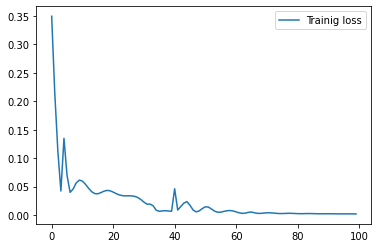

In [37]:
plt.plot(listLoss, label ="Trainig loss")
plt.legend()
plt.show()

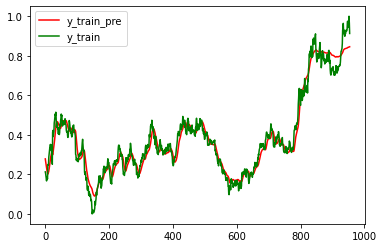

In [38]:
plt.plot(y_train_pred.detach().numpy(), label ="y_train_pre", color ='red')
plt.plot(y_train.detach().numpy(), label ="y_train", color ='green')
plt.legend()
plt.show()

In [39]:
from sklearn.metrics import accuracy_score, r2_score

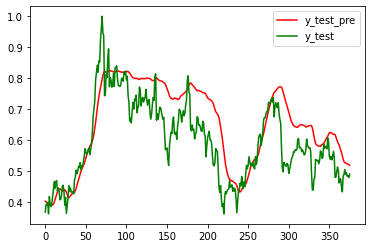

torch.Size([376, 1])

In [40]:
# train evaluation
r2_score = r2_score(y_train.detach().numpy(), y_train_pred.detach().numpy())

r2_score

y_test_pred = model(x_test)

plt.plot(y_test_pred.detach().numpy(), label ="y_test_pre", color ='red')
plt.plot(y_test.detach().numpy(), label ="y_test", color ='green')
plt.legend()
plt.show()

y_test.shape

y_test_pred.shape

In [41]:
#test evaluation
r2_score = r2_score(y_test.detach().numpy(), y_test_pred.detach().numpy())

TypeError: ignored